In [211]:

import sys
import numpy as np
import pandas as pd

import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt


import seaborn as sns
sns.set()  

print( f"Python {sys.version}" )
print( f"Pandas {pd.__version__}" )
print( f"NumPy {np.__version__}" )
print( f"Matplotlib {mpl.__version__}" )
print( f"Seaborn {sns.__version__}" )

Python 3.9.12 (main, Apr  5 2022, 01:53:17) 
[Clang 12.0.0 ]
Pandas 1.4.2
NumPy 1.21.5
Matplotlib 3.5.1
Seaborn 0.11.2


In [212]:
df = pd.read_csv('alltotal.csv')  
df.head()


,country,year,population,births,deaths,migration_rate,population_mid2035,population_mid2050,infant_mortality_rate,fertility_rate,population_age_less_than15,population_age_over65,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Algeria,2022,44.9,22.0,5.0,0.0,52.0,60.0,19.0,3.0,31.0,6.0,NaN,NaN,NaN,NaN
1,Egypt,2022,103.5,21.0,7.0,1.0,123.0,145.0,16.0,3.0,34.0,4.0,NaN,NaN,NaN,NaN
2,Morocco,2022,36.7,17.0,5.0,-1.0,41.0,44.0,15.0,2.0,25.0,8.0,NaN,NaN,NaN,NaN
3,Sudan,2022,46.9,34.0,7.0,0.0,64.0,85.0,39.0,5.0,41.0,4.0,NaN,NaN,NaN,NaN
4,Tunisia,2022,11.8,16.0,8.0,-1.0,13.0,14.0,14.0,2.0,25.0,9.0,NaN,NaN,NaN,NaN


In [213]:
df = df.dropna(axis=1)
df.head()


,country,year,population,births,deaths,migration_rate,population_mid2035,population_mid2050,infant_mortality_rate,fertility_rate,population_age_less_than15,population_age_over65
0,Algeria,2022,44.9,22.0,5.0,0.0,52.0,60.0,19.0,3.0,31.0,6.0
1,Egypt,2022,103.5,21.0,7.0,1.0,123.0,145.0,16.0,3.0,34.0,4.0
2,Morocco,2022,36.7,17.0,5.0,-1.0,41.0,44.0,15.0,2.0,25.0,8.0
3,Sudan,2022,46.9,34.0,7.0,0.0,64.0,85.0,39.0,5.0,41.0,4.0
4,Tunisia,2022,11.8,16.0,8.0,-1.0,13.0,14.0,14.0,2.0,25.0,9.0


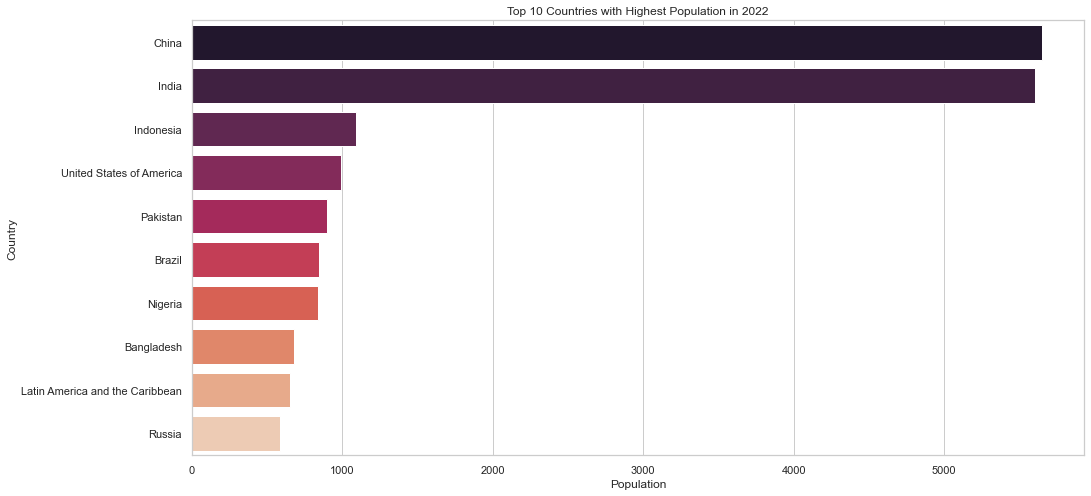

In [219]:


df_pop = df.loc[df['year'] == 2022]
df_pop = df.groupby('country')['population'].sum().reset_index()


df_pop = df_pop.nlargest(10, 'population')


sns.set(rc={'figure.figsize':(16,8)})
sns.set_style('whitegrid')
sns.barplot(data=df_pop, x='population', y='country', palette='rocket')


plt.xlabel('Population')
plt.ylabel('Country')
plt.title('Top 10 Countries with Highest Population in 2022')
plt.show()

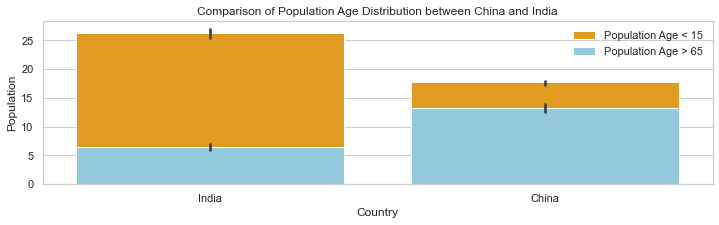

In [216]:
# Filter data for China and India
df_china_india = df.loc[df['country'].isin(['China', 'India'])]


sns.set(rc={'figure.figsize':(12,3)})
sns.set_style("whitegrid")
sns.barplot(data=df_china_india, x='country', y='population_age_less_than15', color='orange', label='Population Age < 15')
sns.barplot(data=df_china_india, x='country', y='population_age_over65', color='skyblue', label='Population Age > 65')
plt.legend()
plt.xlabel('Country')
plt.ylabel('Population')
plt.title('Comparison of Population Age Distribution between China and India')
plt.show()


Text(0.5, 1.0, 'Top 10 Countries with the Highest Elderly Population in 2022')

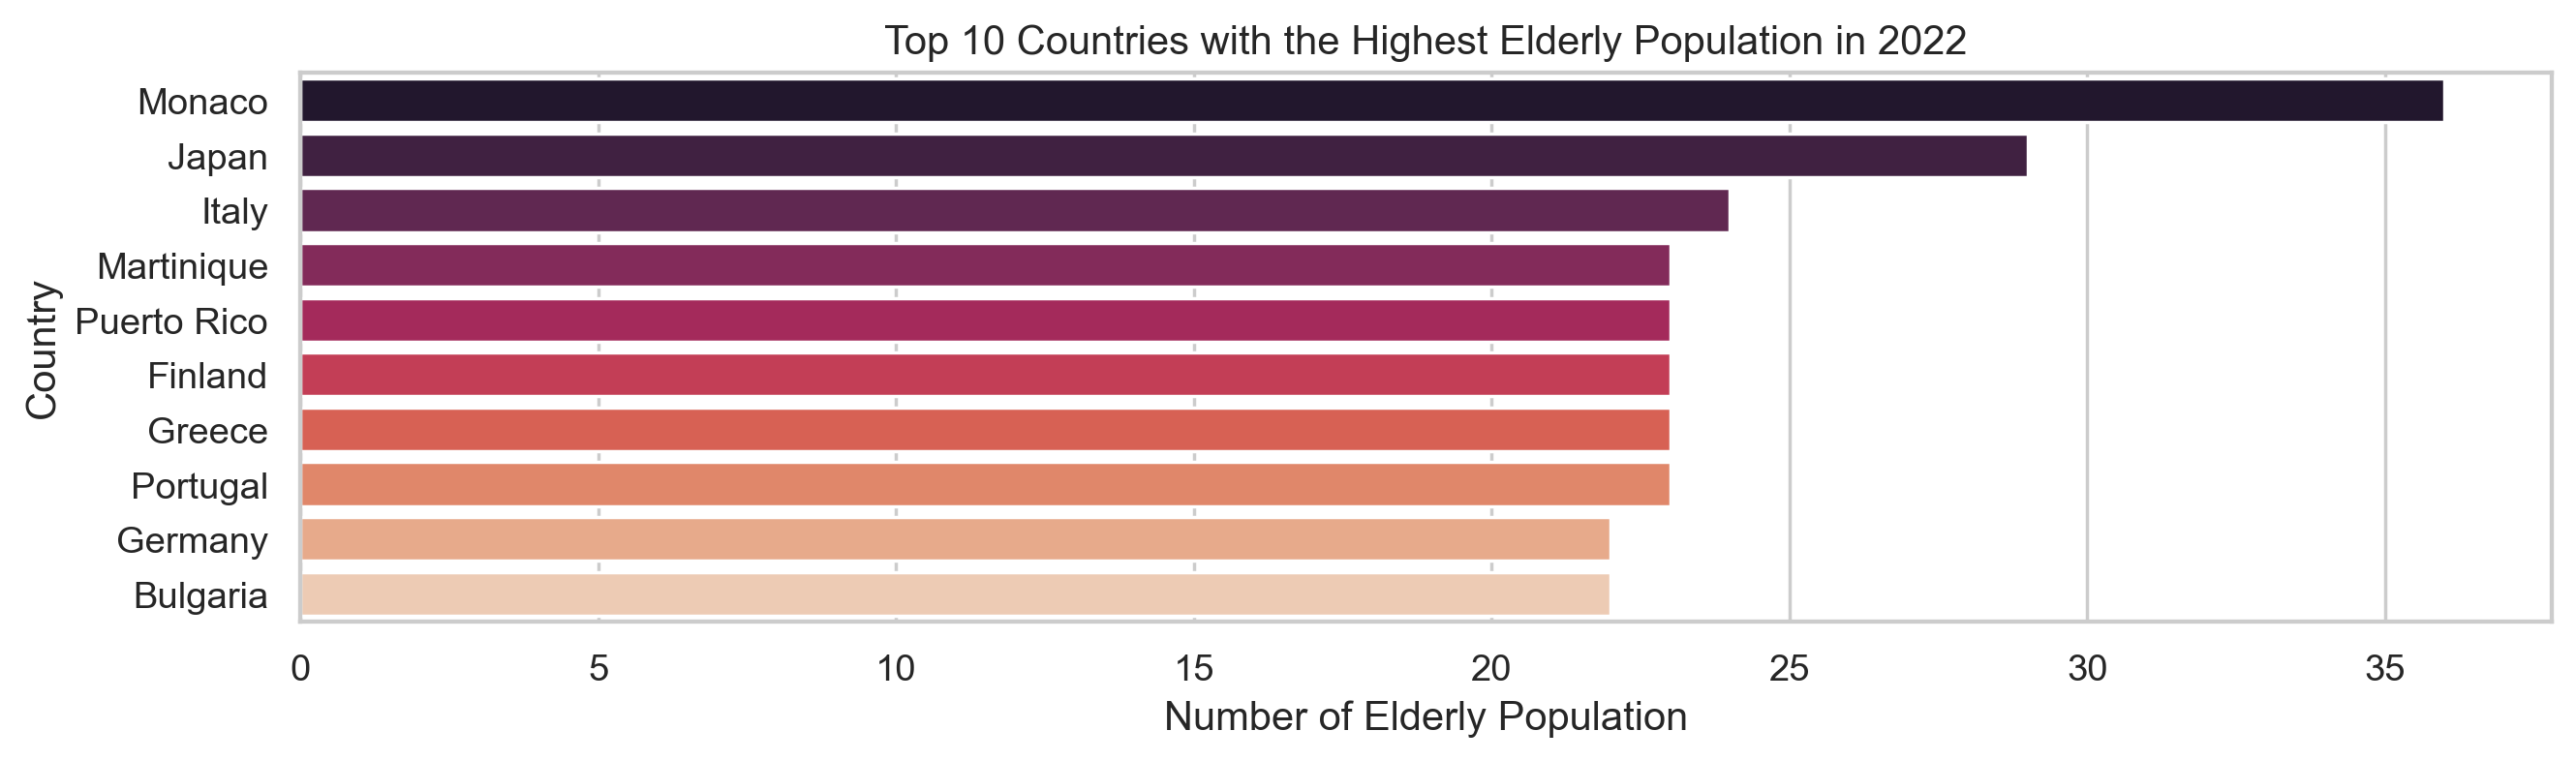

In [168]:
df = df.loc[df['year'] == 2022]


df_elderly = df.nlargest(10, 'population_age_over65')


sns.set_style('whitegrid')
sns.barplot(data=df_elderly, x='population_age_over65', y='country',palette='rocket')


plt.xlabel('Number of Elderly Population')
plt.ylabel('Country')
plt.title('Top 10 Countries with the Highest Elderly Population in 2022')

In [176]:
df2 = df.loc[df['country'].isin(['Thailand', 'Japan','Monaco','Italy','Martinique','Puerto Rico','Finland',' Greece','Portugal','Germany','Bulgaria']), :]

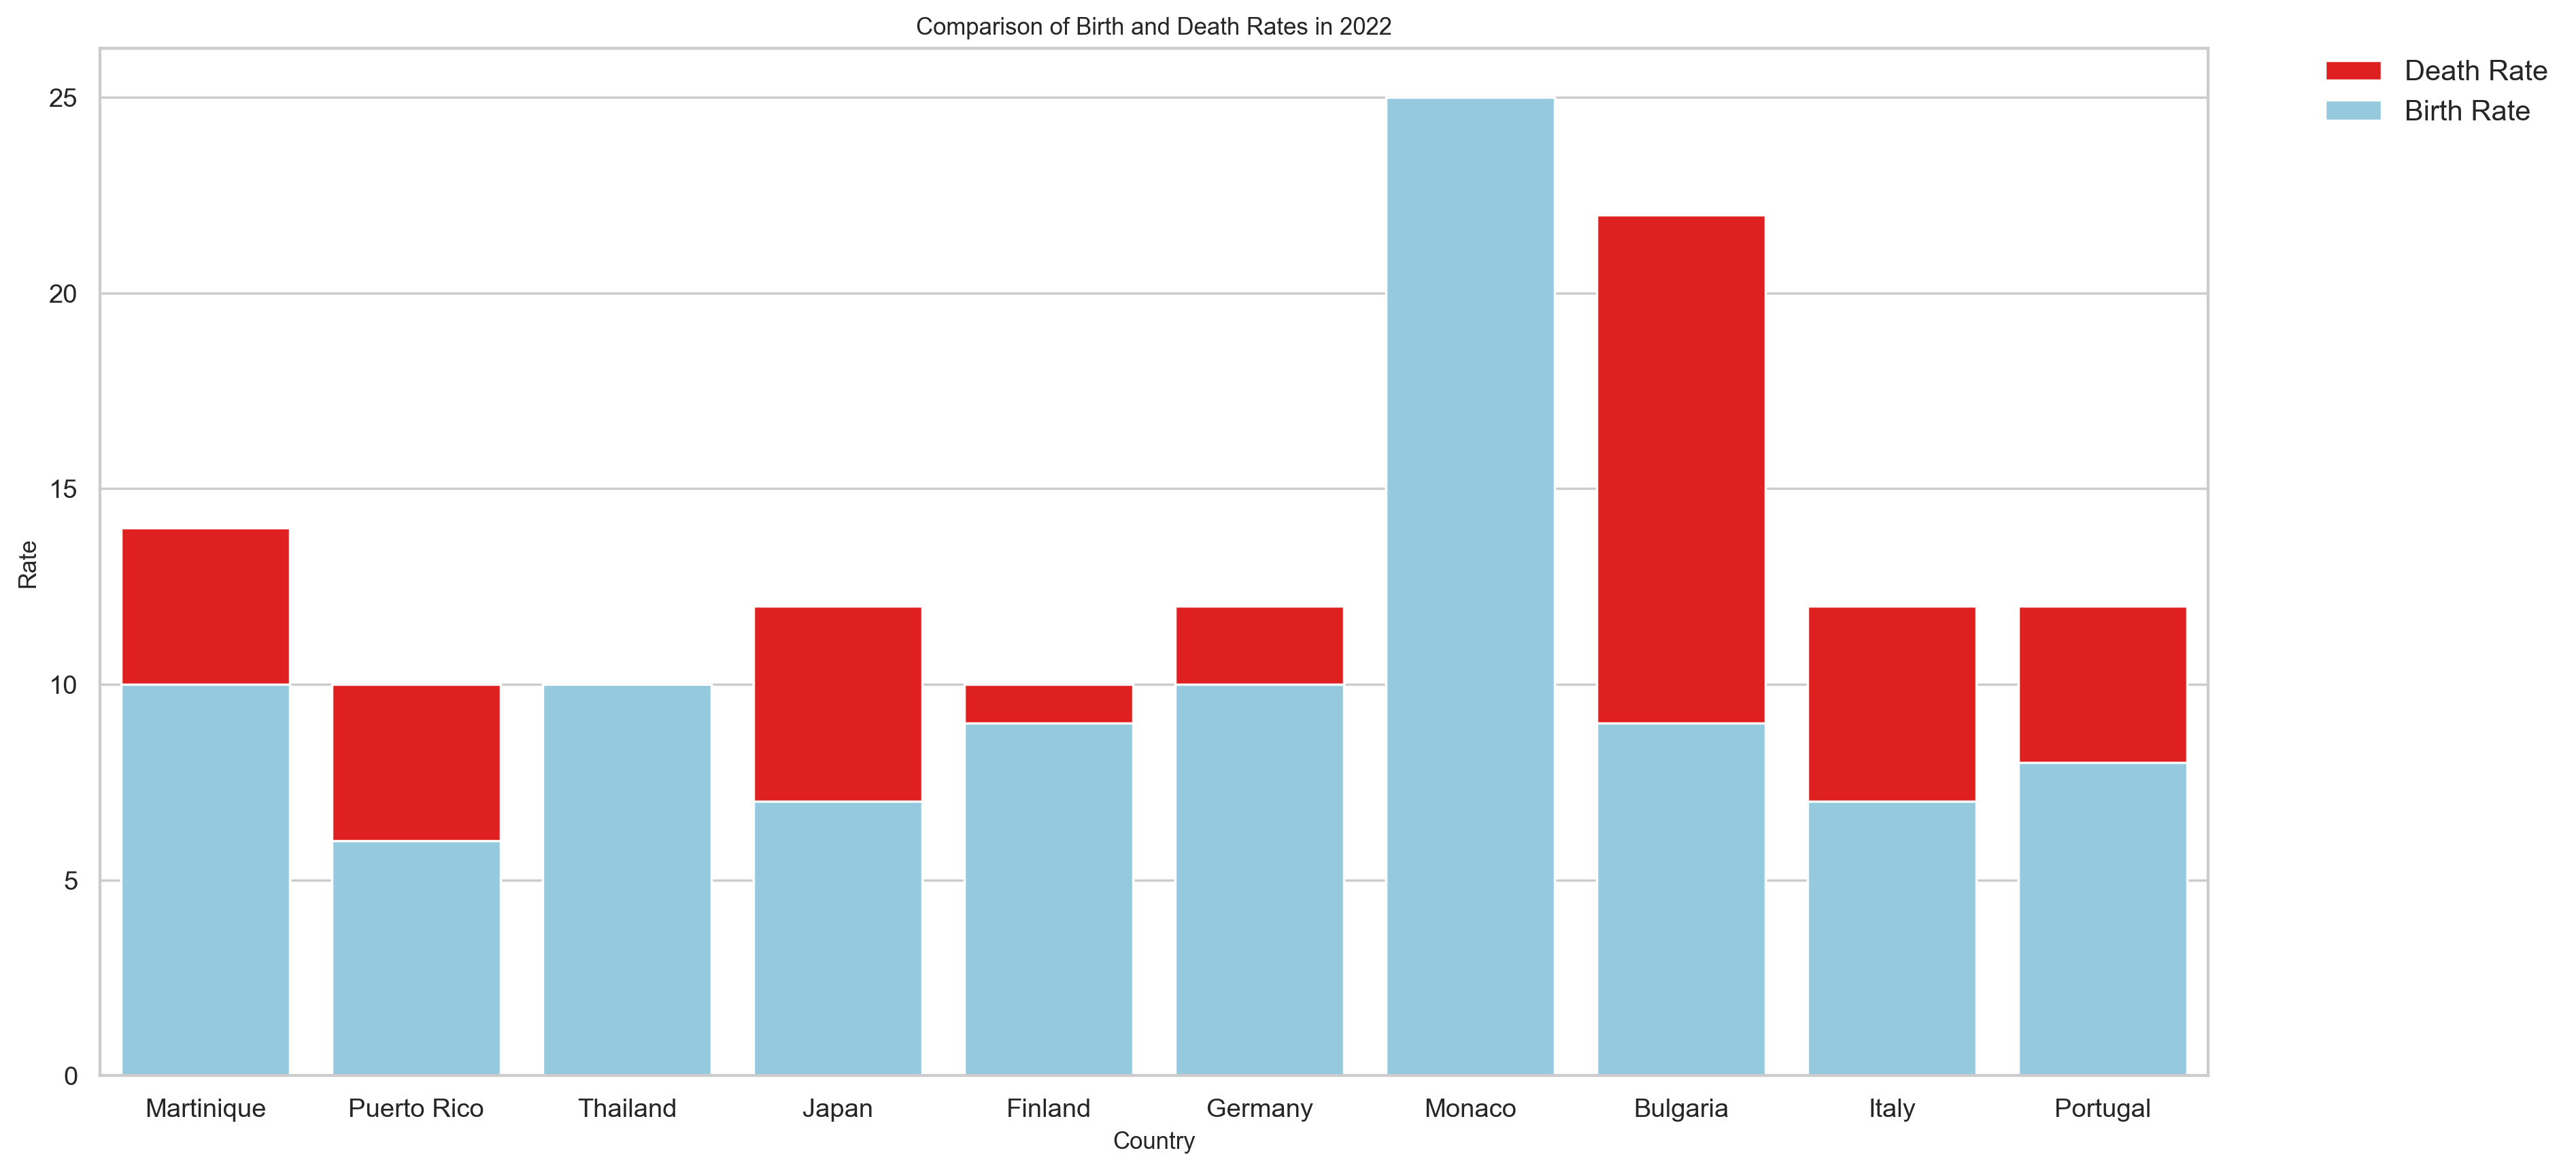

In [177]:
df_elderly = df.loc[df['year'] == 2022]
sns.set(rc={'figure.figsize':(16,8)})
sns.set_style("whitegrid")

sns.barplot(x='country', y='deaths', data=df2, color='red', label='Death Rate')
sns.barplot(x='country', y='births', data=df2, color='skyblue', label='Birth Rate')

plt.xlabel("Country", size=10)
plt.ylabel("Rate", size=10)
plt.title("Comparison of Birth and Death Rates in 2022", size=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=12)

plt.show()

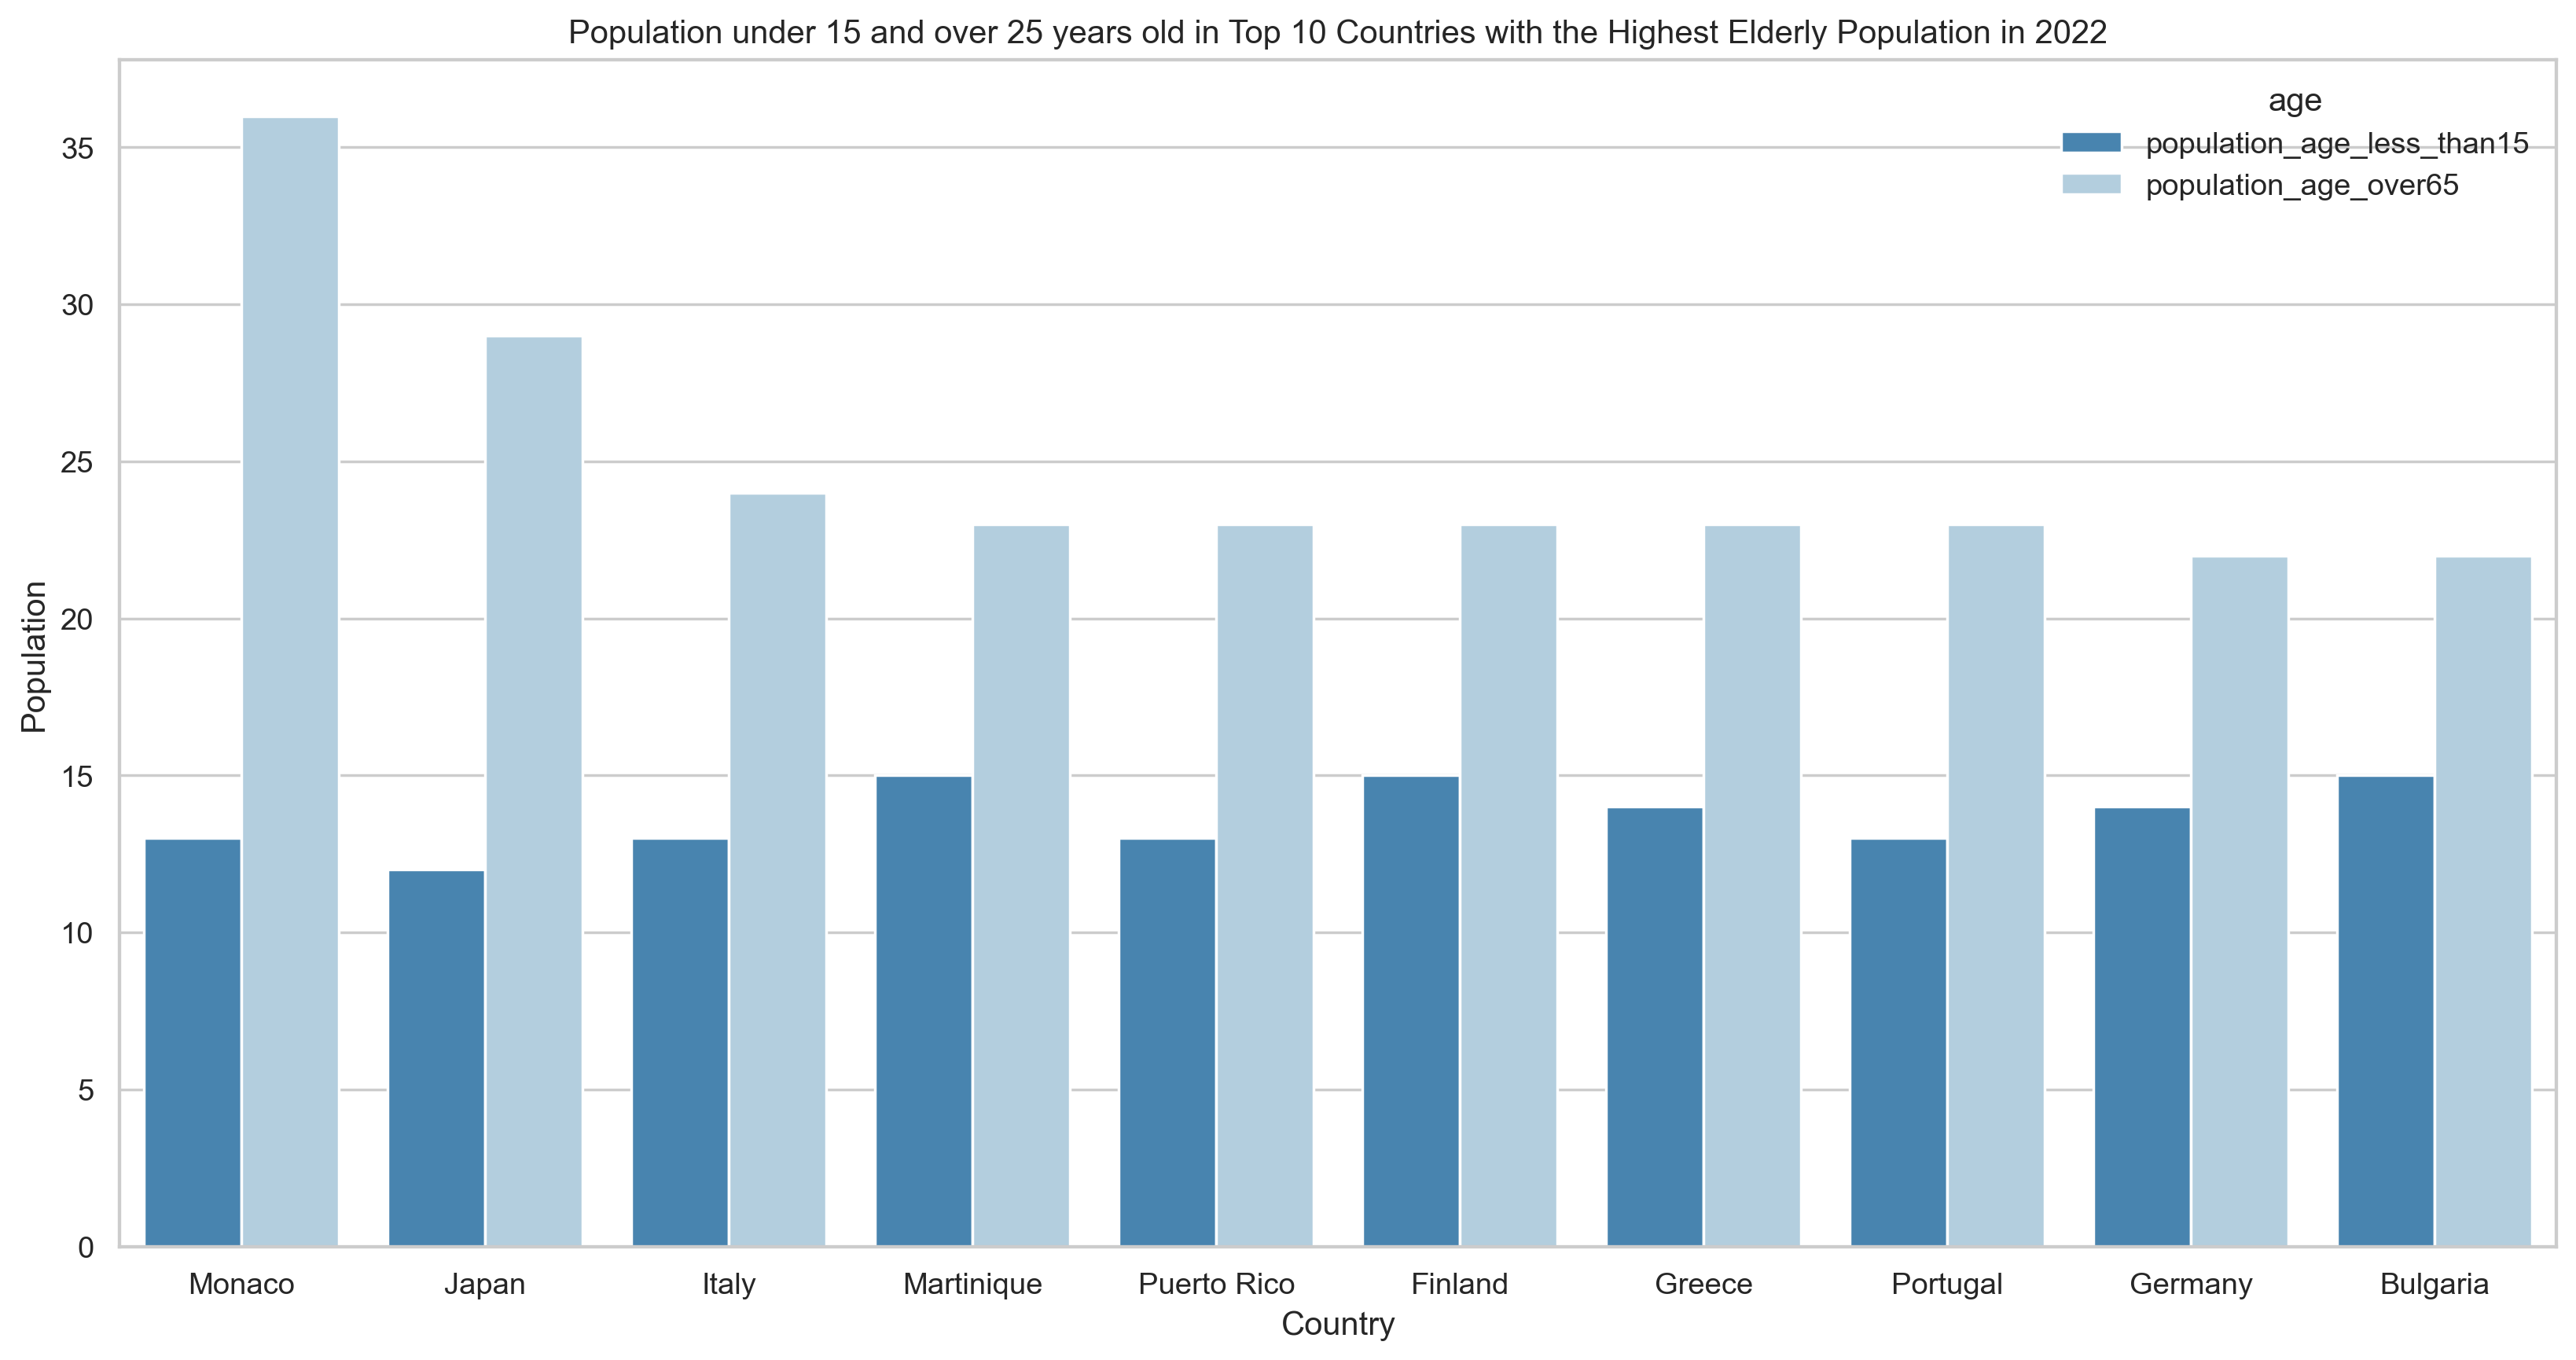

In [186]:
df = df.loc[df['year'] == 2022]


df_elderly = df.nlargest(10, 'population_age_over65')


df_age = df_elderly[['country', 'population_age_less_than15', 'population_age_over65']]
df_age = pd.melt(df_age, id_vars='country', var_name='age', value_name='population')


sns.set_style('whitegrid')
sns.set_palette('pastel')
sns.barplot(data=df_age, x='country', y='population', hue='age',palette='Blues_r')


plt.xlabel('Country')
plt.ylabel('Population')
plt.title('Population under 15 and over 25 years old in Top 10 Countries with the Highest Elderly Population in 2022')


plt.show()